In [14]:
!pip install telebot
!pip install rembg
!git clone -b develop https://github.com/sevdaisk/Mushroom-recognition.git
!rm -r /content/Mushroom-recognition/*.py
!rm -r /content/Mushroom-recognition/.git
!rm -r /content/Mushroom-recognition/.idea
!rm -r /content/Mushroom-recognition/.ipynb_checkpoints

mkdir: cannot create directory ‘mushroom_logs’: File exists


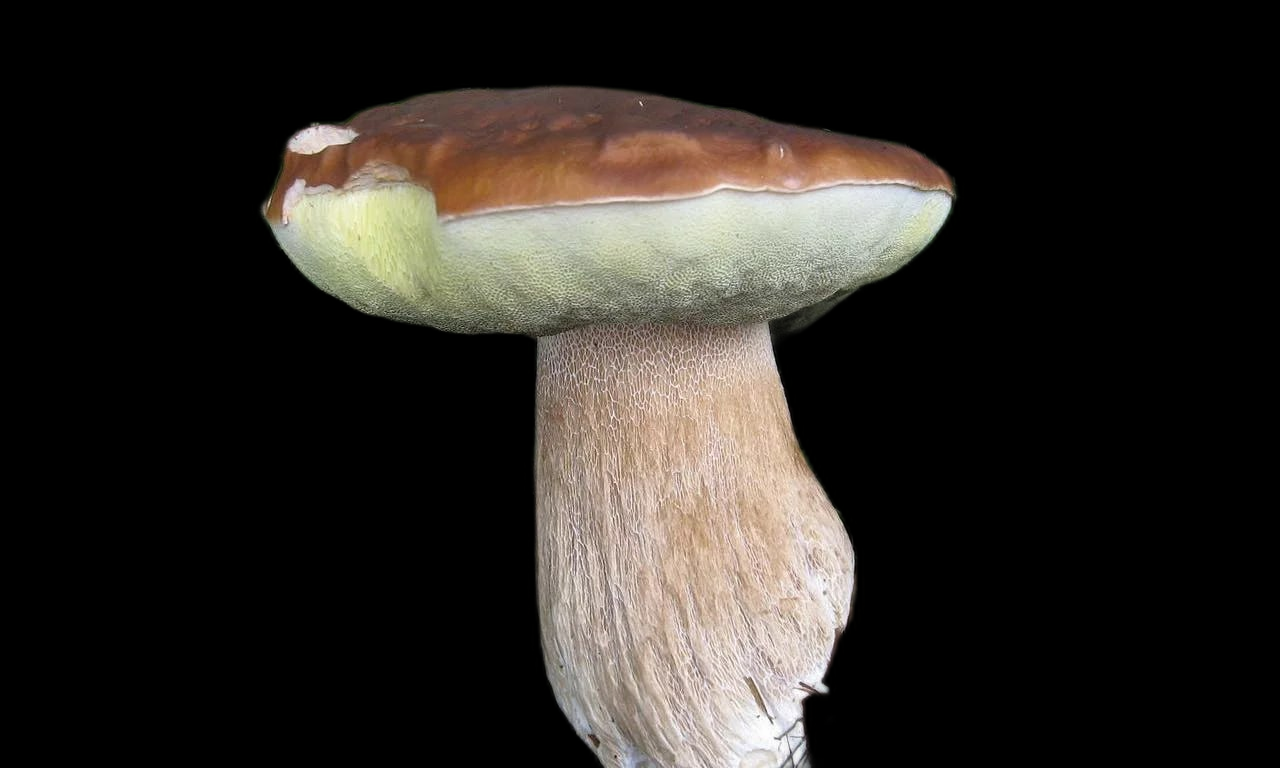

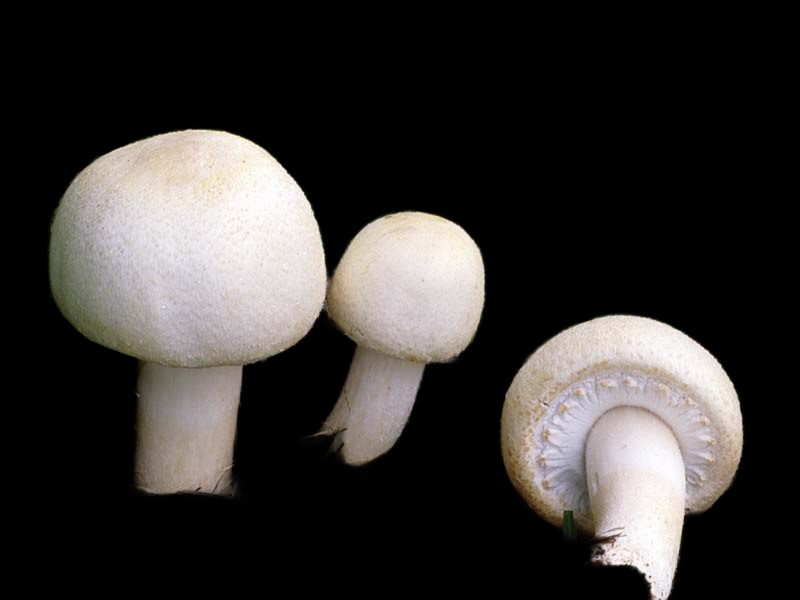

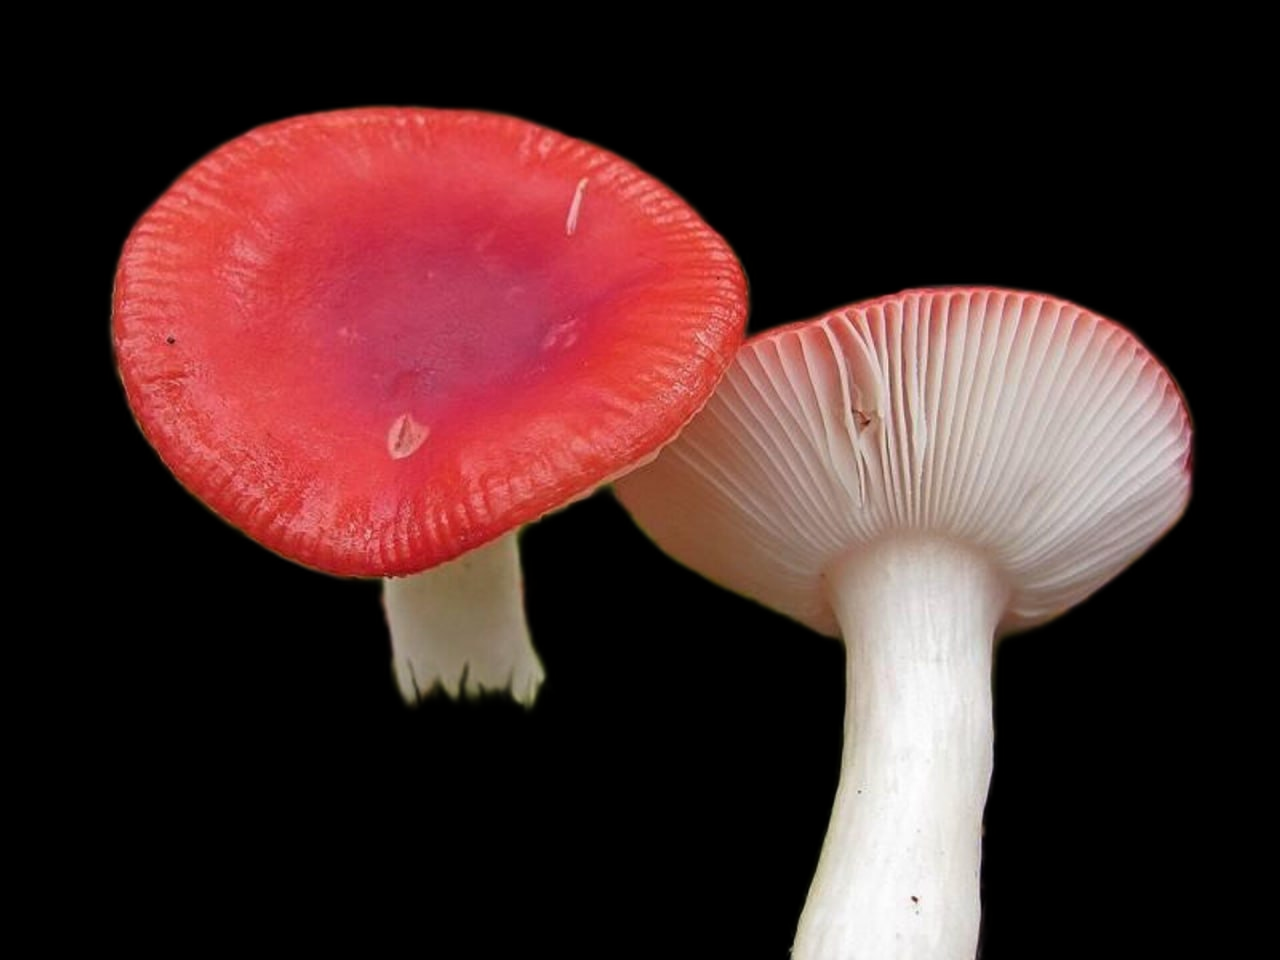

In [ ]:
import telebot
from only_model import ModelInference
TOKEN = '7027172795:AAGaE-tqlMTNAwiIyGavIjypBEQYSTdbNbE'
MODEL_PATH = '/content/epoch_150.pth'

bot = telebot.TeleBot(TOKEN)
model_inference = ModelInference(model_path=MODEL_PATH)

@bot.message_handler(commands=['start'])
def send_welcome(message):
    bot.reply_to(message, "Привет! Отправь мне изображение, и я скажу тебе, что это.")

@bot.message_handler(content_types=['photo'])
def handle_photo(message):
    try:
        file_info = bot.get_file(message.photo[-1].file_id)
        downloaded_file = bot.download_file(file_info.file_path)

        # Сохраняем файл локально
        with open('current_image.jpg', 'wb') as new_file:
            new_file.write(downloaded_file)

        # Выполняем инференс
        prediction = model_inference.inference('current_image.jpg')
        bot.reply_to(message, f'Я думаю, это {prediction}.')
    except Exception as e:
        bot.reply_to(message, f'Произошла ошибка: {e}')

if __name__ == '__main__':
    bot.polling(none_stop=True)